# 제3장 파이썬을 이용한 GIS 데이터 분석
___
## 3.1 __GIS 데이터 분석 소개__


## __사전설정__
---

(1) 저장소 데이터 가져오기

In [ ]:
!rm -rf /content/BizDataAnalysis/

In [1]:
!git clone https://github.com/BizStat/BizDataAnalysis.git

Cloning into 'BizDataAnalysis'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 222 (delta 16), reused 40 (delta 8), pack-reused 174 (from 1)
Receiving objects: 100% (222/222), 124.71 MiB | 9.21 MiB/s, done.
Resolving deltas: 100% (69/69), done.
Updating files: 100% (40/40), done.



(2) matplotlib 환경에서 한글 사용

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -f -v
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,004 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126210 files and dire

런타임 메뉴에서 '세션 다시 시작'

In [1]:
from matplotlib import rc
rc('font', family='NanumMyeongjo')
rc('axes', unicode_minus=False)

___

## __1.__ 벡터 데이터와 레스터 데이터를 이용한 경기도 지역 표현

* 벡터 데이터 불러오기

<Axes: >

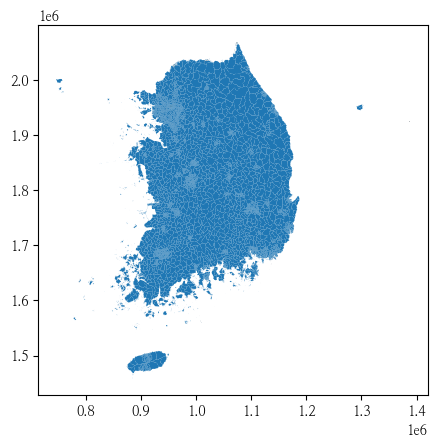

In [2]:
import geopandas as gpd
emd = gpd.read_file('/content/BizDataAnalysis/DATA/emd.shp',encoding='CP949')
emd.plot()

In [3]:
emd.head()


,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.19 19..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,Changseong-dong,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."


* 경기도 지역

In [ ]:
gg_vec = emd[emd['EMD_CD'].apply(lambda x : x.startswith('41'))]
gg_vec.plot()
#plt.show()

* 레스터 데이터 불러오기

In [ ]:
!pip install rasterio

In [ ]:
import rasterio
import matplotlib.pyplot as plt
gg_raster = rasterio.open(r'/content/BizDataAnalysis/DATA/slope_gg.tif')

In [ ]:
plt.imshow(gg_raster.read(1), cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.show()

In [ ]:
gg_raster.count

In [ ]:
gg_raster.height

In [ ]:
gg_raster.crs

In [ ]:
tmp = gg_raster.read(1)

In [ ]:
tmp

In [ ]:
import numpy as np

In [ ]:
# -9999인 값을 결측값으로 수정
tmp_filtered = np.where(tmp <= -9999, np.nan, tmp)

In [ ]:
tmp_filtered

In [ ]:
plt.imshow(tmp_filtered, cmap='terrain')
# plt.colorbar(label='Elevation (m)')
plt.show()

## __2.__ 간단한 벡터 데이터를 이용한 공간 데이터 만들기

In [6]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point

In [4]:
p1 = [1,2]
p2 = [2,2]
p3 = [2,3]
p4 = [1,3]
p5 = [1.5,1.3]

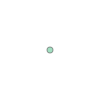

In [9]:
Point(p1)

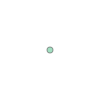

In [7]:
Point(p5)

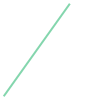

In [10]:
LineString([p5,p2])

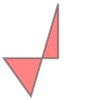

In [11]:
Polygon([p1,p2,p3,p5])

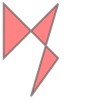

In [12]:
Polygon([p1,p3,p5,p2,p4])

In [13]:
geom = [Point(p1),LineString([p1,p3]),Polygon([p1,p2,p3]),Polygon([p1,p3,p5,p2,p4])]
#id = [1,2,3,4]
tmp = pd.DataFrame({'id':[1,2,3,4], 'geom':geom})

In [14]:
tmp.head()


,id,geom
0,1,POINT (1 2)
1,2,"LINESTRING (1 2, 2 3)"
2,3,"POLYGON ((1 2, 2 2, 2 3, 1 2))"
3,4,"POLYGON ((1 2, 2 3, 1.5 1.3, 2 2, 1 3, 1 2))"


In [ ]:
tmp = gpd.GeoDataFrame(tmp,geometry='geom')

In [ ]:
tmp.plot()
plt.show()